In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn

# Data

In [110]:
df = sns.load_dataset('penguins')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# EDA

In [111]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [112]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [113]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [114]:
df['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

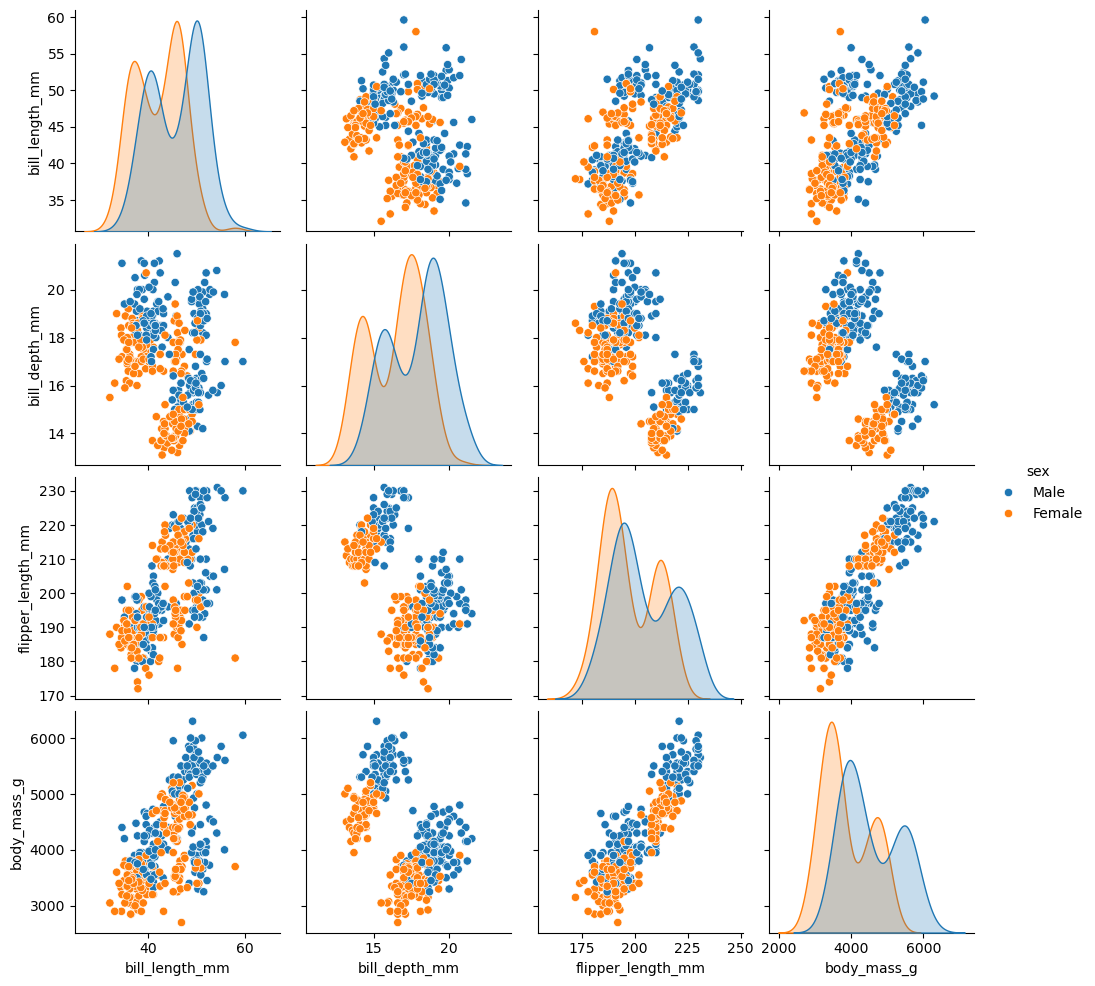

In [115]:
sns.pairplot(data=df, hue='sex')

# Remove Missing Values

In [116]:
df.dropna(inplace = True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# Define target and features

In [118]:
target = 'sex'
features = [col for col in df.columns if col != target]

print('Target:', target)
print('Features:', features)

Target: sex
Features: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [119]:
df_target = df[[target]]
df_features = df[features]

# One-hot encoding of categorical features

In [120]:
df_features = pd.get_dummies(df_features, dtype=int, drop_first=True)

In [121]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   species_Chinstrap  333 non-null    int64  
 5   species_Gentoo     333 non-null    int64  
 6   island_Dream       333 non-null    int64  
 7   island_Torgersen   333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.4 KB


In [122]:
df_features.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.204204,0.357357,0.369369,0.141141
std,5.468668,1.969235,14.015765,805.215802,0.403726,0.479942,0.483360,0.348691
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,0.000000,0.000000,0.000000,0.000000
75%,48.600000,18.700000,213.000000,4775.000000,0.000000,1.000000,1.000000,0.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000,1.000000,1.000000


# Split Training and Test

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
df_features_train, df_features_test, df_target_train, df_target_test = train_test_split(df_features, df_target, test_size=0.3)

In [125]:
print(df_features_train.shape)
print(df_features_test.shape)
print(df_target_train.shape)
print(df_target_test.shape)

(233, 8)
(100, 8)
(233, 1)
(100, 1)


# Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [127]:
scaler = MinMaxScaler()

scaler.fit(df_features_train)

X_train = scaler.transform(df_features_train)
X_test = scaler.transform(df_features_test)

In [128]:
print(np.min(X_train))
print(np.max(X_train))
print(np.mean(X_train))
print(np.std(X_train))

0.0
1.0
0.3642128716325612
0.36901583135839305


In [129]:
y_train = df_target_train.values.ravel()
y_test = df_target_test.values.ravel()

# Classification

# k-Nearest Neighbor

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
k = 9

classifier = KNeighborsClassifier(n_neighbors = k)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [132]:
y_correct = y_predict == y_test

print('Correct', np.sum(y_correct), len(y_test))

Correct 91 100


In [133]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [134]:
df_target_test[f'{k}NN predicted'] = y_predict
df_target_test[f'{k}NN correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct
123,Male,Male,True
7,Male,Male,True
103,Male,Male,True
5,Male,Male,True
53,Male,Male,True
...,...,...,...
230,Female,Female,True
142,Female,Female,True
6,Female,Female,True
325,Male,Male,True


# Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
classifier = GaussianNB()

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [137]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [138]:
df_target_test[f'NB predicted'] = y_predict
df_target_test[f'NB correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct,NB predicted,NB correct
123,Male,Male,True,Female,True
7,Male,Male,True,Female,True
103,Male,Male,True,Male,True
5,Male,Male,True,Female,True
53,Male,Male,True,Male,True
...,...,...,...,...,...
230,Female,Female,True,Female,True
142,Female,Female,True,Female,True
6,Female,Female,True,Female,True
325,Male,Male,True,Male,True


# Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
classifier = DecisionTreeClassifier(max_depth = 4)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [141]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [142]:
df_target_test[f'DT predicted'] = y_predict
df_target_test[f'DT correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct,NB predicted,NB correct,DT predicted,DT correct
123,Male,Male,True,Female,True,Female,True
7,Male,Male,True,Female,True,Male,True
103,Male,Male,True,Male,True,Male,True
5,Male,Male,True,Female,True,Male,True
53,Male,Male,True,Male,True,Male,True
...,...,...,...,...,...,...,...
230,Female,Female,True,Female,True,Female,True
142,Female,Female,True,Female,True,Female,True
6,Female,Female,True,Female,True,Female,True
325,Male,Male,True,Male,True,Male,True


In [143]:
from sklearn.tree import plot_tree

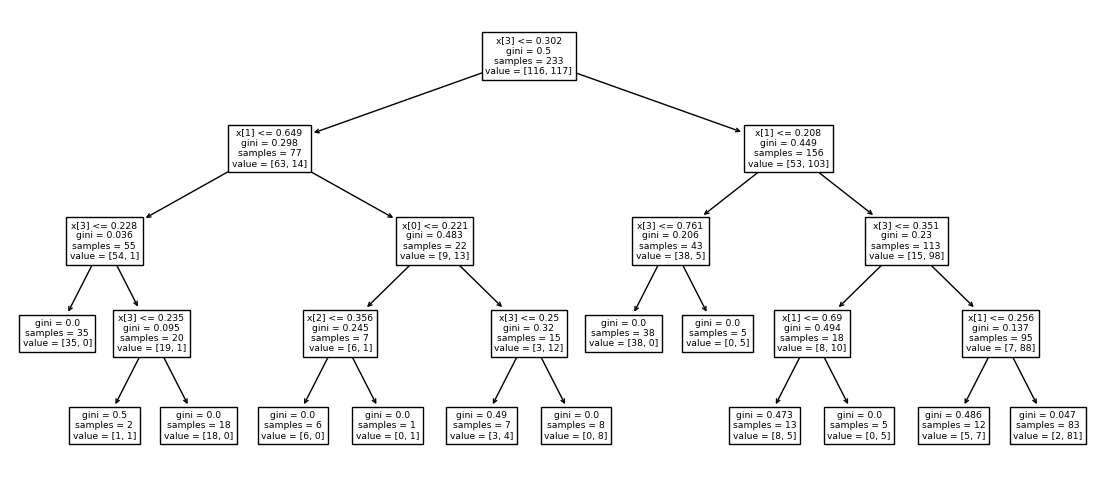

In [144]:
plt.figure(figsize = (14,6))
plot_tree(classifier)
plt.show()

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
classifier = RandomForestClassifier()

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [147]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [148]:
df_target_test[f'RF predicted'] = y_predict
df_target_test[f'RF correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct,NB predicted,NB correct,DT predicted,DT correct,RF predicted,RF correct
123,Male,Male,True,Female,True,Female,True,Male,True
7,Male,Male,True,Female,True,Male,True,Male,True
103,Male,Male,True,Male,True,Male,True,Male,True
5,Male,Male,True,Female,True,Male,True,Male,True
53,Male,Male,True,Male,True,Male,True,Male,True
...,...,...,...,...,...,...,...,...,...
230,Female,Female,True,Female,True,Female,True,Female,True
142,Female,Female,True,Female,True,Female,True,Female,True
6,Female,Female,True,Female,True,Female,True,Female,True
325,Male,Male,True,Male,True,Male,True,Male,True


In [149]:
dict(zip(features, classifier.feature_importances_.round(3)))

{'species': 0.208,
 'island': 0.301,
 'bill_length_mm': 0.135,
 'bill_depth_mm': 0.286,
 'flipper_length_mm': 0.02,
 'body_mass_g': 0.03}

# Support Vector Machine

In [150]:
from sklearn.svm import SVC

In [151]:
classifier = SVC()

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [152]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [153]:
df_target_test[f'SVM predicted'] = y_predict
df_target_test[f'SVM correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct,NB predicted,NB correct,DT predicted,DT correct,RF predicted,RF correct,SVM predicted,SVM correct
123,Male,Male,True,Female,True,Female,True,Male,True,Male,True
7,Male,Male,True,Female,True,Male,True,Male,True,Male,True
103,Male,Male,True,Male,True,Male,True,Male,True,Male,True
5,Male,Male,True,Female,True,Male,True,Male,True,Male,True
53,Male,Male,True,Male,True,Male,True,Male,True,Male,True
...,...,...,...,...,...,...,...,...,...,...,...
230,Female,Female,True,Female,True,Female,True,Female,True,Female,True
142,Female,Female,True,Female,True,Female,True,Female,True,Female,True
6,Female,Female,True,Female,True,Female,True,Female,True,Female,True
325,Male,Male,True,Male,True,Male,True,Male,True,Male,True


# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [156]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


# Support Vector Machine

In [150]:
from sklearn.svm import SVC

In [151]:
classifier = SVC()

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [152]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [153]:
df_target_test[f'SVM predicted'] = y_predict
df_target_test[f'SVM correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct,NB predicted,NB correct,DT predicted,DT correct,RF predicted,RF correct,SVM predicted,SVM correct
123,Male,Male,True,Female,True,Female,True,Male,True,Male,True
7,Male,Male,True,Female,True,Male,True,Male,True,Male,True
103,Male,Male,True,Male,True,Male,True,Male,True,Male,True
5,Male,Male,True,Female,True,Male,True,Male,True,Male,True
53,Male,Male,True,Male,True,Male,True,Male,True,Male,True
...,...,...,...,...,...,...,...,...,...,...,...
230,Female,Female,True,Female,True,Female,True,Female,True,Female,True
142,Female,Female,True,Female,True,Female,True,Female,True,Female,True
6,Female,Female,True,Female,True,Female,True,Female,True,Female,True
325,Male,Male,True,Male,True,Male,True,Male,True,Male,True


# Neural Network

In [159]:
from sklearn.neural_network import MLPClassifier

In [163]:
classifier = MLPClassifier(max_iter=1000)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [164]:
accuracy = np.sum(y_correct) / len(y_test)

print('Accuracy:', accuracy)

Accuracy: 0.91


In [165]:
df_target_test[f'MLP predicted'] = y_predict
df_target_test[f'MLP correct'] = y_correct
df_target_test

,sex,9NN predicted,9NN correct,NB predicted,NB correct,DT predicted,DT correct,RF predicted,RF correct,SVM predicted,SVM correct,LR predicted,LR correct,MLP predicted,MLP correct
123,Male,Male,True,Female,True,Female,True,Male,True,Male,True,Male,True,Male,True
7,Male,Male,True,Female,True,Male,True,Male,True,Male,True,Male,True,Male,True
103,Male,Male,True,Male,True,Male,True,Male,True,Male,True,Male,True,Male,True
5,Male,Male,True,Female,True,Male,True,Male,True,Male,True,Male,True,Male,True
53,Male,Male,True,Male,True,Male,True,Male,True,Male,True,Male,True,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Female,Female,True,Female,True,Female,True,Female,True,Female,True,Female,True,Female,True
142,Female,Female,True,Female,True,Female,True,Female,True,Female,True,Female,True,Female,True
6,Female,Female,True,Female,True,Female,True,Female,True,Female,True,Female,True,Female,True
325,Male,Male,True,Male,True,Male,True,Male,True,Male,True,Male,True,Male,True
